## Observations and Insights

1. The four most promising treatment regimes are - Capomulin, Ceftamin, Infubinol, and Ramicane.

2. Among those regimens - Capmulin and Ramicane are the most effective at lowering tumor volume and have no outliers.

3. Among those regimens - Ceftamin and Infubinol were least effective as they had a higher tumor volume and was inconsistant as it contained outliers.

4. Among those treatment regimens - gender had no impact on the results.

5. There is a correlation between mouse weight and tumor volume.

## Dependencies and starter code

In [38]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
combined_data = pd.merge(mouse_metadata, 
                         study_results, 
                         on = 'Mouse ID')

# Display the data table for preview
combined_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [39]:
# Checking the number of mice.
mice = combined_data["Mouse ID"].value_counts()
number_of_mice = len(mice)
number_of_mice

249

In [40]:
# Looking for duplicate mice, and then identifying the duplicates.
duplicate_mice = combined_data.loc[combined_data.duplicated(subset=['Mouse ID', 'Timepoint',]),'Mouse ID'].unique()
all_duplicate_mouse_id = pd.DataFrame(duplicate_mice)
all_duplicate_mouse_id

,0
0,g989


In [41]:
# Clean data frame, plus counting the mice to make sure the data has been cleaned of the duplicate mouse.
clean_combined_data = combined_data[combined_data['Mouse ID'].isin(duplicate_mice) == False]
clean_mice = clean_df["Mouse ID"].value_counts()
clean_number_of_mice = len(clean_mice)
clean_number_of_mice

248

## Summary statistics

In [42]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
drug_regimen = clean_combined_data.groupby('Drug Regimen')

statistics_df = pd.DataFrame({
    'Mean': drug_regimen['Tumor Volume (mm3)'].mean(),
    'Median': drug_regimen['Tumor Volume (mm3)'].median(),
    'Variance': drug_regimen['Tumor Volume (mm3)'].var(),
    'Standard Deviation': drug_regimen['Tumor Volume (mm3)'].std(),
    'Standard Error of the Mean': drug_regimen['Tumor Volume (mm3)'].sem()
})

statistics_df

,Mean,Median,Variance,Standard Deviation,Standard Error of the Mean
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar plots

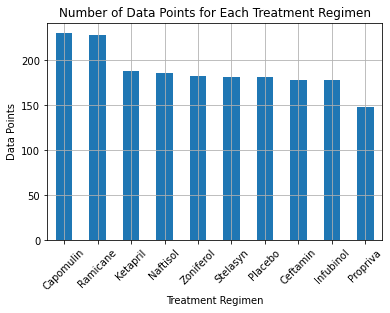

In [43]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
bar_pandas = clean_combined_data["Drug Regimen"].value_counts()

bar_pandas.plot(kind = 'bar',
                rot = 45)

plt.title('Number of Data Points for Each Treatment Regimen')
plt.xlabel('Treatment Regimen')
plt.ylabel('Data Points')
plt.grid()

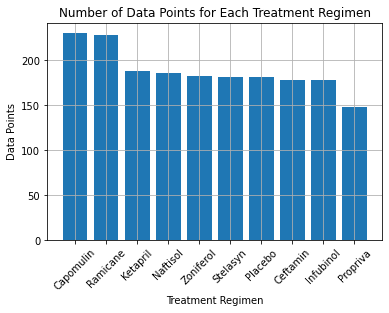

In [44]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
plt.bar(clean_combined_data['Drug Regimen'].value_counts().index, 
        clean_combined_data['Drug Regimen'].value_counts())

plt.xticks(rotation = 45 )
plt.title('Number of Data Points for Each Treatment Regimen')
plt.xlabel('Treatment Regimen')
plt.ylabel('Data Points')
plt.grid()

## Pie plots

<AxesSubplot:title={'center':'Distribution of Female Versus Male Mice'}, ylabel='Sex'>

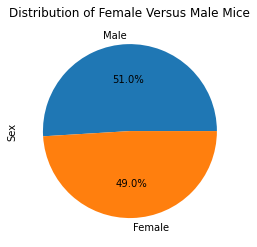

In [45]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
pie_pandas = clean_combined_data['Sex'].value_counts()

pie_pandas.plot(kind = 'pie',
                title='Distribution of Female Versus Male Mice',
                autopct='%1.1f%%')

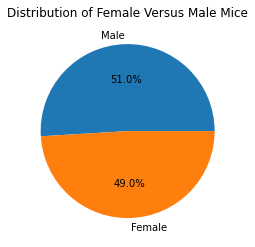

In [46]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(pie_pandas, 
        labels=pie_pandas.index, 
        autopct="%1.1f%%")

plt.title('Distribution of Female Versus Male Mice')

plt.show()

## Quartiles, outliers and boxplots

In [47]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers.
final_tumor = clean_combined_data[['Mouse ID','Timepoint']].groupby('Mouse ID').max().reset_index()

mouse_timepoint = pd.merge(final_tumor, 
                            clean_combined_data, 
                           on = ['Mouse ID','Timepoint']).rename(columns = {'Timepoint_x':'Final Timepoint'})

regimen_groupby = mouse_timepoint[['Drug Regimen','Tumor Volume (mm3)']].groupby('Drug Regimen')

quartiles = pd.DataFrame({'Lower Quartile': regimen_groupby['Tumor Volume (mm3)'].quantile(q = .25),
                         'Median': regimen_groupby['Tumor Volume (mm3)'].quantile(q = .5),
                         'Upper Quartile': regimen_groupby['Tumor Volume (mm3)'].quantile(q = .75)}).reset_index()

quartiles['IQR'] = quartiles['Upper Quartile'] - quartiles['Lower Quartile']

quartiles['Lower Bound'] = quartiles['Lower Quartile'] - quartiles['IQR']*1.5
quartiles['Upper Bound'] = quartiles['Upper Quartile'] + quartiles['IQR']*1.5

promising_treatments = mouse_timepoint.groupby('Drug Regimen')['Tumor Volume (mm3)'].min().sort_values()

quantitative_df = pd.merge(quartiles,
                           promising_treatments, 
                           on = 'Drug Regimen')

quantitative_df.head(4)

,Drug Regimen,Lower Quartile,Median,Upper Quartile,IQR,Lower Bound,Upper Bound,Tumor Volume (mm3)
0,Capomulin,32.377357,38.125164,40.159220,7.781863,20.704562,51.832015,23.343598
1,Ceftamin,48.722078,59.851956,64.299830,15.577752,25.355450,87.666458,45.000000
2,Infubinol,54.048608,60.165180,65.525743,11.477135,36.832905,82.741446,36.321346
3,Ketapril,56.720095,64.487812,69.872251,13.152155,36.991862,89.600484,45.000000


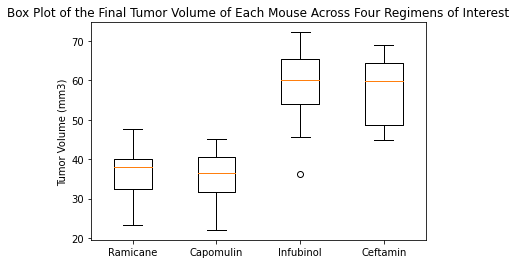

In [48]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
ramicane = mouse_timepoint.loc[mouse_timepoint['Drug Regimen'] == 'Ramicane']['Tumor Volume (mm3)']
capomulin = mouse_timepoint.loc[mouse_timepoint['Drug Regimen'] == 'Capomulin']['Tumor Volume (mm3)']
infubinol = mouse_timepoint.loc[mouse_timepoint['Drug Regimen'] == 'Infubinol']['Tumor Volume (mm3)']
ceftamin = mouse_timepoint.loc[mouse_timepoint['Drug Regimen'] == 'Ceftamin']['Tumor Volume (mm3)']

figure = plt.figure()
ax = figure.add_subplot()

ax.set_title('Box Plot of the Final Tumor Volume of Each Mouse Across Four Regimens of Interest')
ax.set_ylabel('Tumor Volume (mm3)')

ax.boxplot([capomulin,ramicane,infubinol,ceftamin])
ax.set_xticklabels(['Ramicane','Capomulin','Infubinol','Ceftamin'])

plt.show()

## Line and scatter plots

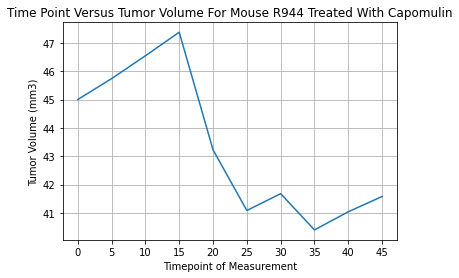

In [49]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

regimen_capomulin = clean_combined_data[(clean_combined_data['Drug Regimen']=='Capomulin')]
r944 = regimen_capomulin[(regimen_capomulin['Mouse ID']=='r944')]

x_axis = np.arange(len(r944))
tick_locations = [value for value in x_axis]

plt.plot(x_axis, r944['Tumor Volume (mm3)'])

plt.xticks(tick_locations, r944['Timepoint'])
plt.title('Time Point Versus Tumor Volume For Mouse R944 Treated With Capomulin')
plt.xlabel('Timepoint of Measurement')
plt.ylabel('Tumor Volume (mm3)')
plt.grid()

plt.show()

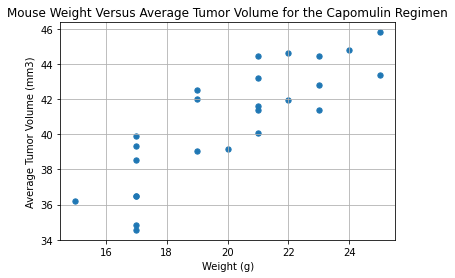

In [10]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
regimen_df = pd.DataFrame({
    'Average Tumor Volume (mm3)': regimen_capomulin.groupby('Mouse ID')['Tumor Volume (mm3)'].mean(),
    'Weight (g)': regimen_capomulin.groupby('Mouse ID')['Weight (g)'].mean()
})

regimen_df.plot(kind='scatter', 
                  x='Weight (g)', 
                  y='Average Tumor Volume (mm3)', 
                  s=28)

plt.title('Mouse Weight Versus Average Tumor Volume for the Capomulin Regimen')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.grid()

plt.show()

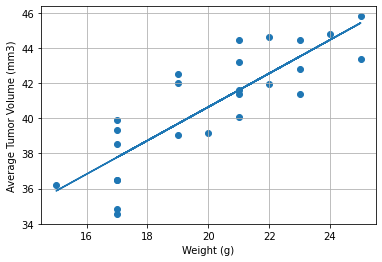

Correlation coefficient: 0.84


In [11]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
weight = regimen_df.loc[:,'Weight (g)']
average_tumor_volume = regimen_df.loc[:,'Average Tumor Volume (mm3)']

correlation = st.pearsonr(weight,average_tumor_volume)

slope, intercept, r, p, std_err = st.linregress(weight, average_tumor_volume)

line = slope * weight + intercept

plt.scatter(weight,average_tumor_volume)
plt.plot(weight,line)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.grid()

plt.show()

print(f"Correlation coefficient: {round(correlation[0],2)}")